In [ ]:
! git clone https://github.com/iniestaserranoalberto/NLP.git

fatal: destination path 'NLP' already exists and is not an empty directory.


In [ ]:
! pip install -r NLP/requirements.txt

  Cloning https://github.com/amaiya/eli5 (to revision tfkeras_0_10_1) to /tmp/pip-req-build-rexuiui8
  Running command git clone -q https://github.com/amaiya/eli5 /tmp/pip-req-build-rexuiui8
  Running command git checkout -b tfkeras_0_10_1 --track origin/tfkeras_0_10_1
  Switched to a new branch 'tfkeras_0_10_1'
  Branch 'tfkeras_0_10_1' set up to track remote branch 'tfkeras_0_10_1' from 'origin'.
  Cloning https://github.com/amaiya/stellargraph (to revision no_tf_dep_082) to /tmp/pip-req-build-3hejuh7e
  Running command git clone -q https://github.com/amaiya/stellargraph /tmp/pip-req-build-3hejuh7e
  Running command git checkout -b no_tf_dep_082 --track origin/no_tf_dep_082
  Switched to a new branch 'no_tf_dep_082'
  Branch 'no_tf_dep_082' set up to track remote branch 'no_tf_dep_082' from 'origin'.
  Created wheel for eli5: filename=eli5-0.10.1-py2.py3-none-any.whl size=106850 sha256=092345d7d391d96bf752913ffd053bee6da729afbd5327ba4cf3847ab999c283
  Stored in directory: /tmp/pip-ep

In [ ]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>")) # Increase cell width
display(HTML("<style>.rendered_html { font-size: 16px; }</style>")) # Increase font size

# Matplotlib conf
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn conf
import seaborn as sns
sns.set_palette(sns.color_palette("seismic"))

import sys

import pandas as pd
import numpy as np
import operator
import string
import nltk
import os

import regex
from nltk.corpus import stopwords 
from nltk.tokenize import WordPunctTokenizer
from string import punctuation
from nltk.stem import WordNetLemmatizer
from nltk import wordnet

nltk.download('stopwords')

from collections import Counter

from sklearn.datasets import fetch_20newsgroups

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix 
from sklearn.metrics import confusion_matrix

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Import of 20news groups train dataset

In [ ]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes'), shuffle=True, random_state=42)
training_df = pd.DataFrame()
training_df['Text'] = dataset.data
training_df['source'] = dataset.target
label=[]
for i in training_df['source']:
    label.append(dataset.target_names[i])
training_df['Class']=label

In [ ]:
training_df.head()

,Text,source,Class
0,I was wondering if anyone out there could enli...,7,rec.autos
1,A fair number of brave souls who upgraded thei...,4,comp.sys.mac.hardware
2,"well folks, my mac plus finally gave up the gh...",4,comp.sys.mac.hardware
3,\nDo you have Weitek's address/phone number? ...,1,comp.graphics
4,"From article <C5owCB.n3p@world.std.com>, by to...",14,sci.space


In [ ]:
training_df.drop(['source'],axis=1,inplace=True)

In [ ]:
training_df['Class'].value_counts()

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
sci.space                   593
comp.windows.x              593
sci.electronics             591
comp.os.ms-windows.misc     591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: Class, dtype: int64

In [ ]:
training_df['Class'].replace({'talk.politics.misc':'politics','talk.politics.guns':'politics',
                     'talk.politics.mideast':'politics'},inplace=True)
                    
# replace to sport
training_df['Class'].replace({'rec.sport.hockey':'sport','rec.sport.baseball':'sport'},inplace=True)
                    
# replace to religion
training_df['Class'].replace({'soc.religion.christian':'religion','talk.religion.misc':'religion'},inplace=True)
                    
# replace to computer
training_df['Class'].replace({'comp.windows.x':'computer','comp.sys.ibm.pc.hardware':'computer',
                    'comp.os.ms-windows.misc':'computer','comp.graphics':'computer',
                    'comp.sys.mac.hardware':'computer'},inplace=True)  
# replace to sales
training_df['Class'].replace({'misc.forsale':'sales'},inplace=True)

# replace to automobile
training_df['Class'].replace({'rec.autos':'automobile','rec.motorcycles':'automobile'},inplace=True)

# replace to science
training_df['Class'].replace({'sci.crypt':'science','sci.electronics':'science','sci.space':'science'},inplace=True)

# replace to medicine
training_df['Class'].replace({'sci.med':'medicine'},inplace=True)

In [ ]:
training_df['Class'].nunique()

9

In [ ]:
training_df['Class'].value_counts()

computer       2936
science        1779
politics       1575
sport          1197
automobile     1192
religion        976
medicine        594
sales           585
alt.atheism     480
Name: Class, dtype: int64

In [ ]:
training_df = training_df[training_df['Class'].isin(['religion', 'automobile', 'medicine','sport'] )]

In [ ]:
training_df['words_count'] = training_df['Text'].apply(lambda x:len(str(x).split()))
training_df.head()

,Text,Class,words_count
0,I was wondering if anyone out there could enli...,automobile,91
6,There were a few people who responded to my re...,medicine,63
10,I have a line on a Ducati 900GTS 1978 model wi...,automobile,108
11,"\nYep, that's pretty much it. I'm not a Jew bu...",religion,472
17,I recently posted an article asking what kind ...,automobile,1464


In [ ]:
no_text = training_df[training_df['words_count']==0]
print(len(no_text))

124


In [ ]:
training_df.drop(no_text.index,inplace=True)
print(len(no_text))

124


In [ ]:
no_text = training_df[training_df['words_count']==0]
print(len(no_text))

0


In [ ]:
training_df

,Text,Class,words_count
0,I was wondering if anyone out there could enli...,automobile,91
6,There were a few people who responded to my re...,medicine,63
10,I have a line on a Ducati 900GTS 1978 model wi...,automobile,108
11,"\nYep, that's pretty much it. I'm not a Jew bu...",religion,472
17,I recently posted an article asking what kind ...,automobile,1464
...,...,...,...
11296,\n\n\n\n\n Anaheim.,sport,1
11298,After reading some of the reports of possible ...,sport,186
11300,\nI am asking you to believe in things not vis...,religion,447
11309,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,medicine,300


# Import of 20news groups test dataset

In [ ]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(subset='test',remove=('headers', 'footers', 'quotes'), shuffle=True, random_state=42)
test_df = pd.DataFrame()
test_df['Text'] = dataset.data
test_df['source'] = dataset.target
label=[]
for i in test_df['source']:
    label.append(dataset.target_names[i])
test_df['Class']=label

In [ ]:
test_df.head()

,Text,source,Class
0,I am a little confused on all of the models of...,7,rec.autos
1,I'm not familiar at all with the format of the...,5,comp.windows.x
2,"\nIn a word, yes.\n",0,alt.atheism
3,\nThey were attacking the Iraqis to drive them...,17,talk.politics.mideast
4,\nI've just spent two solid months arguing tha...,19,talk.religion.misc


In [ ]:
test_df.drop(['source'],axis=1,inplace=True)

In [ ]:
test_df['Class'].value_counts()

rec.sport.hockey            399
soc.religion.christian      398
rec.motorcycles             398
rec.sport.baseball          397
rec.autos                   396
sci.med                     396
sci.crypt                   396
comp.windows.x              395
sci.space                   394
comp.os.ms-windows.misc     394
sci.electronics             393
comp.sys.ibm.pc.hardware    392
misc.forsale                390
comp.graphics               389
comp.sys.mac.hardware       385
talk.politics.mideast       376
talk.politics.guns          364
alt.atheism                 319
talk.politics.misc          310
talk.religion.misc          251
Name: Class, dtype: int64

In [ ]:
test_df['Class'].replace({'talk.politics.misc':'politics','talk.politics.guns':'politics',
                     'talk.politics.mideast':'politics'},inplace=True)
                    
# replace to sport
test_df['Class'].replace({'rec.sport.hockey':'sport','rec.sport.baseball':'sport'},inplace=True)
                    
# replace to religion
test_df['Class'].replace({'soc.religion.christian':'religion','talk.religion.misc':'religion'},inplace=True)
                    
# replace to computer
test_df['Class'].replace({'comp.windows.x':'computer','comp.sys.ibm.pc.hardware':'computer',
                    'comp.os.ms-windows.misc':'computer','comp.graphics':'computer',
                    'comp.sys.mac.hardware':'computer'},inplace=True)  
# replace to sales
test_df['Class'].replace({'misc.forsale':'sales'},inplace=True)

# replace to automobile
test_df['Class'].replace({'rec.autos':'automobile','rec.motorcycles':'automobile'},inplace=True)

# replace to science
test_df['Class'].replace({'sci.crypt':'science','sci.electronics':'science','sci.space':'science'},inplace=True)

# replace to medicine
test_df['Class'].replace({'sci.med':'medicine'},inplace=True)

In [ ]:
test_df['Class'].nunique()

9

In [ ]:
test_df['Class'].value_counts()

computer       1955
science        1183
politics       1050
sport           796
automobile      794
religion        649
medicine        396
sales           390
alt.atheism     319
Name: Class, dtype: int64

In [ ]:
test_df = test_df[test_df['Class'].isin(['religion', 'automobile', 'medicine','sport'] )]

In [ ]:
test_df['words_count'] =test_df['Text'].apply(lambda x:len(str(x).split()))
test_df.head()

,Text,Class,words_count
0,I am a little confused on all of the models of...,automobile,92
4,\nI've just spent two solid months arguing tha...,religion,17
5,"\nElisabeth, let's set the record straight for...",medicine,454
6,"Dishonest money dwindles away, but he who gath...",religion,17
7,A friend of mine managed to get a copy of a co...,religion,87


In [ ]:
no_text = test_df[test_df['words_count']==0]
print(len(no_text))

90


In [ ]:
test_df.drop(no_text.index,inplace=True)
print(len(no_text))

90


In [ ]:
no_text = training_df[training_df['words_count']==0]
print(len(no_text))

0


In [ ]:
test_df

,Text,Class,words_count
0,I am a little confused on all of the models of...,automobile,92
4,\nI've just spent two solid months arguing tha...,religion,17
5,"\nElisabeth, let's set the record straight for...",medicine,454
6,"Dishonest money dwindles away, but he who gath...",religion,17
7,A friend of mine managed to get a copy of a co...,religion,87
...,...,...,...
7520,"First off, if I'm not mistaken, only hibernati...",medicine,95
7522,": \n: >move a little, the pain will be excruti...",medicine,171
7526,1954 MG-TF with frame-up restoration in early ...,automobile,215
7529,"I sent a version of this post out a while ago,...",sport,125


# Dataset Analysis

In [ ]:
training_df.columns = ['text', 'target','words_count']
training_df.head()

,text,target,words_count
0,I was wondering if anyone out there could enli...,automobile,91
6,There were a few people who responded to my re...,medicine,63
10,I have a line on a Ducati 900GTS 1978 model wi...,automobile,108
11,"\nYep, that's pretty much it. I'm not a Jew bu...",religion,472
17,I recently posted an article asking what kind ...,automobile,1464


In [ ]:
test_df.columns = ['text', 'target','words_count']
test_df.head()

,text,target,words_count
0,I am a little confused on all of the models of...,automobile,92
4,\nI've just spent two solid months arguing tha...,religion,17
5,"\nElisabeth, let's set the record straight for...",medicine,454
6,"Dishonest money dwindles away, but he who gath...",religion,17
7,A friend of mine managed to get a copy of a co...,religion,87


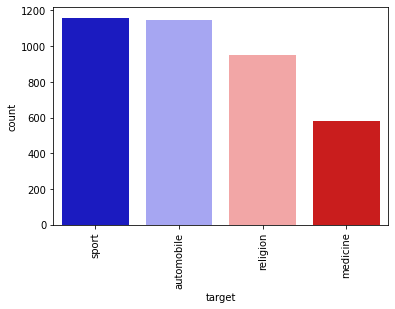

In [ ]:
sns.countplot(x=training_df.target, order=[x for x, count in sorted(Counter(training_df.target).items(), key=lambda x: -x[1])], palette="seismic")
plt.xticks(rotation=90);

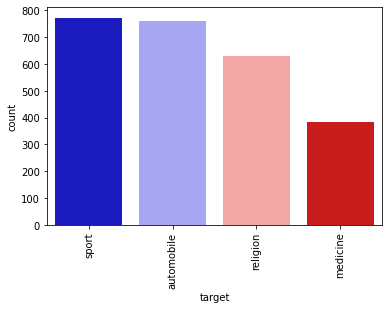

In [ ]:
sns.countplot(x=test_df.target, order=[x for x, count in sorted(Counter(training_df.target).items(), key=lambda x: -x[1])], palette="seismic")
plt.xticks(rotation=90);

In [ ]:
def plot_most_common_features(text_col, target_col, n_features=50):
    from matplotlib import interactive

    df = pd.DataFrame({"text": text_col, "CLASS": target_col})
    grouped = df.groupby(["CLASS"]).apply(lambda x: x["text"].sum())
    grouped_df = pd.DataFrame({"CLASS": grouped.index, "text": grouped.values})

    from nltk.tokenize import WhitespaceTokenizer
    tokenizer = WhitespaceTokenizer()

    for ii, text in enumerate(grouped_df.text):
        pd.DataFrame(tokenizer.tokenize(text)).apply(pd.value_counts).head(n_features).plot(kind="bar", cmap=plt.cm.seismic, figsize=(20,5))
        plt.title(grouped_df.CLASS[ii], fontsize=20)
        plt.xticks(fontsize=15)
        plt.legend([])
        interactive(True)
        plt.show()

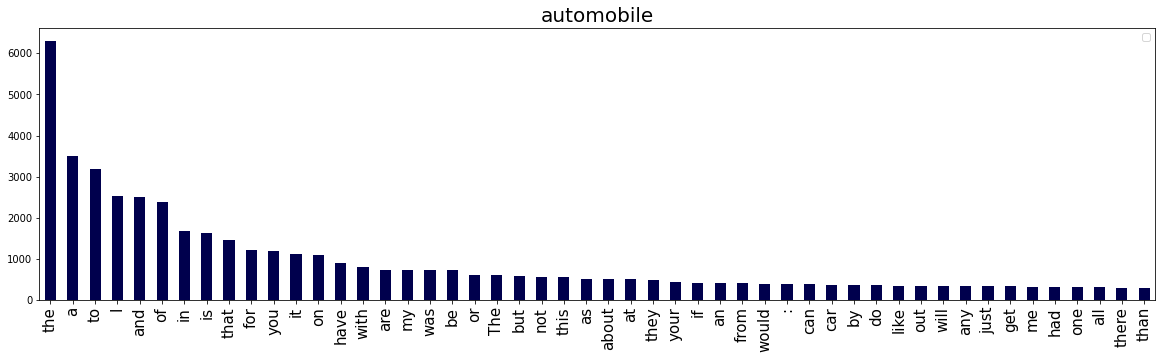

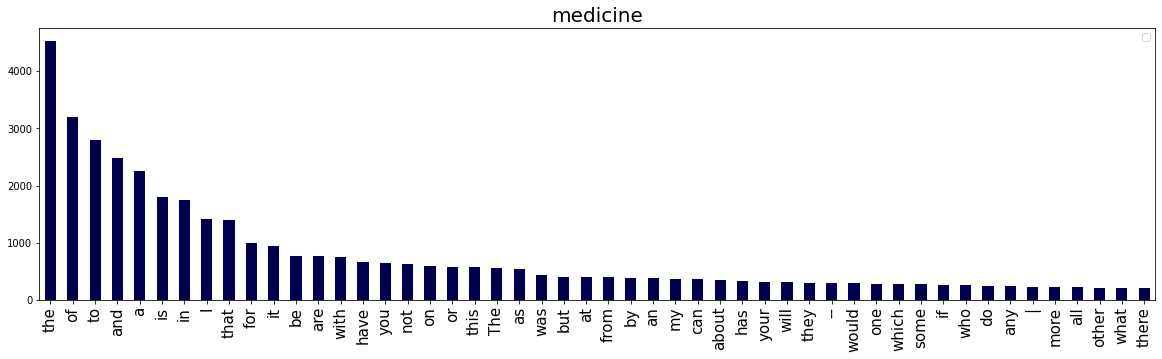

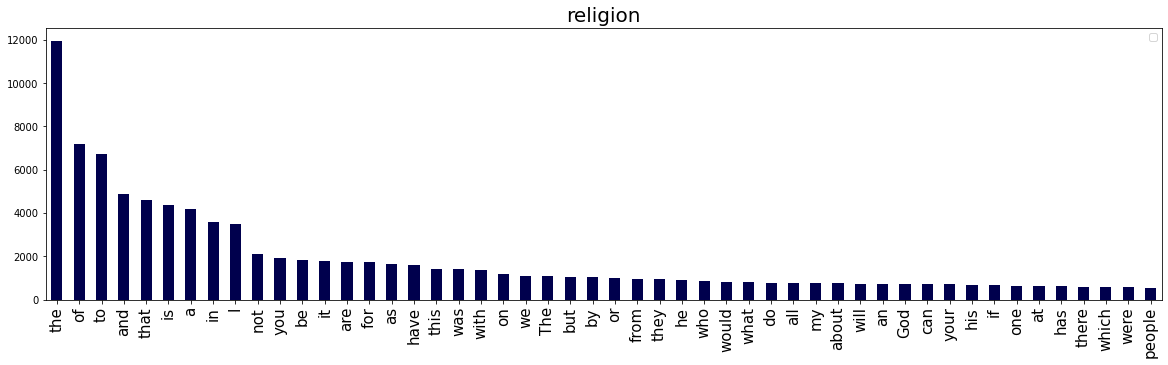

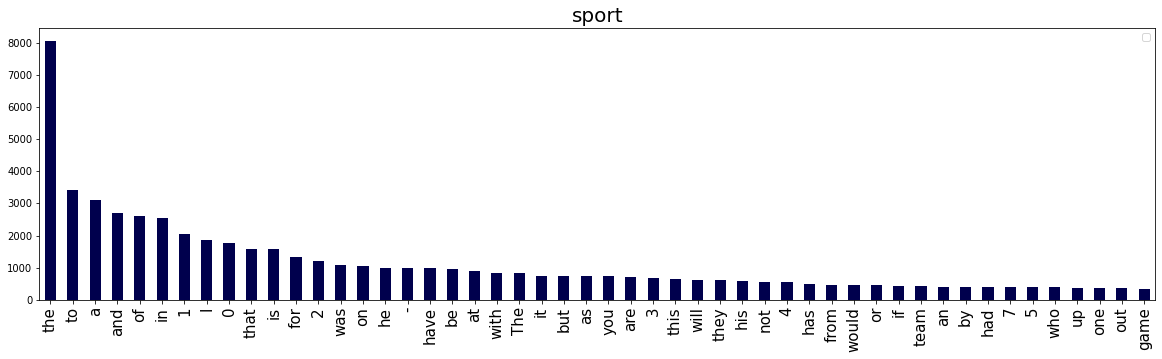

In [ ]:
plot_most_common_features(training_df.text, training_df.target)

In [ ]:
dataset = pd.concat([training_df,test_df], sort=True)

In [ ]:
dataset

,target,text,words_count
0,automobile,I was wondering if anyone out there could enli...,91
6,medicine,There were a few people who responded to my re...,63
10,automobile,I have a line on a Ducati 900GTS 1978 model wi...,108
11,religion,"\nYep, that's pretty much it. I'm not a Jew bu...",472
17,automobile,I recently posted an article asking what kind ...,1464
...,...,...,...
7520,medicine,"First off, if I'm not mistaken, only hibernati...",95
7522,medicine,": \n: >move a little, the pain will be excruti...",171
7526,automobile,1954 MG-TF with frame-up restoration in early ...,215
7529,sport,"I sent a version of this post out a while ago,...",125


In [ ]:
from nltk.stem import *
from nltk.corpus import stopwords

import re

def process_text(raw_text):

    letters_only = re.sub("[^a-zA-Z]", " ",raw_text) 
    letters_only = letters_only.lower()
    letters_only = re.sub('\[.*?\]', '', letters_only)
    letters_only= re.sub('https?://\S+|www\.\S+', '', letters_only)
    letters_only = re.sub('<.*?>+', '', letters_only)
    letters_only = re.sub('[%s]' % re.escape(string.punctuation), '', letters_only)
    letters_only = re.sub('\n', '', letters_only)
    letters_only = re.sub('\w*\d\w*', '', letters_only)
    words = letters_only.lower().split()
    
    stops = set(stopwords.words("english")) 
    not_stop_words = [w for w in words if not w in stops]
    
    stemmer = PorterStemmer()
    stemmed = [stemmer.stem(word) for word in not_stop_words]
    
    return( " ".join( stemmed ))  

In [ ]:
dataset['clean_text'] = dataset['text'].apply(lambda x: process_text(x))
dataset.head()

,target,text,words_count,clean_text
0,automobile,I was wondering if anyone out there could enli...,91,wonder anyon could enlighten car saw day door ...
6,medicine,There were a few people who responded to my re...,63,peopl respond request info treatment astrocyto...
10,automobile,I have a line on a Ducati 900GTS 1978 model wi...,108,line ducati gt model k clock run well paint br...
11,religion,"\nYep, that's pretty much it. I'm not a Jew bu...",472,yep pretti much jew understand jewish way thin...
17,automobile,I recently posted an article asking what kind ...,1464,recent post articl ask kind rate singl male dr...


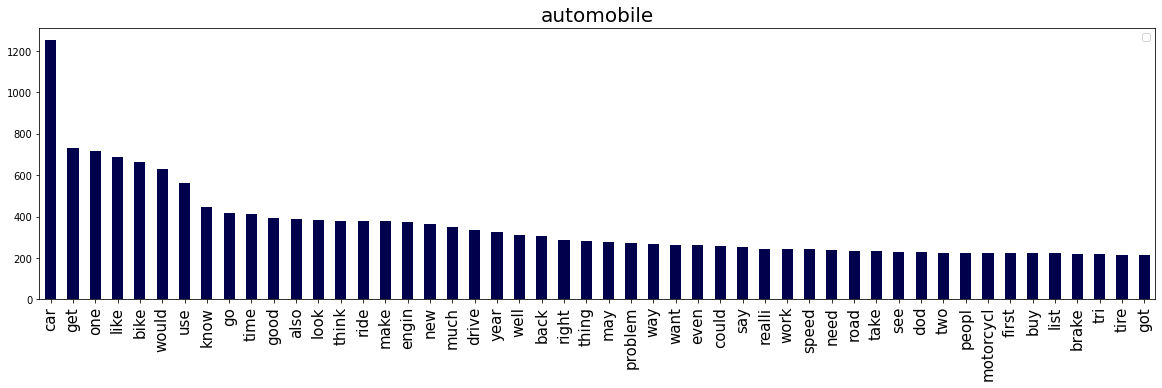

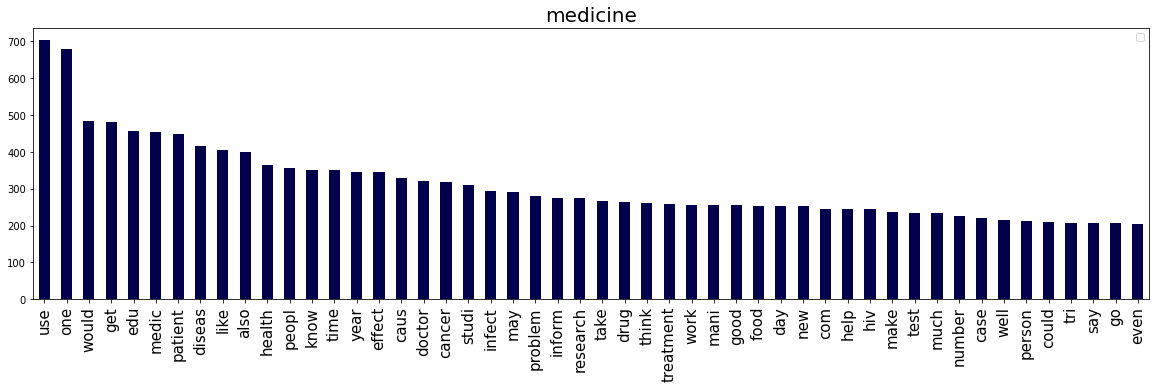

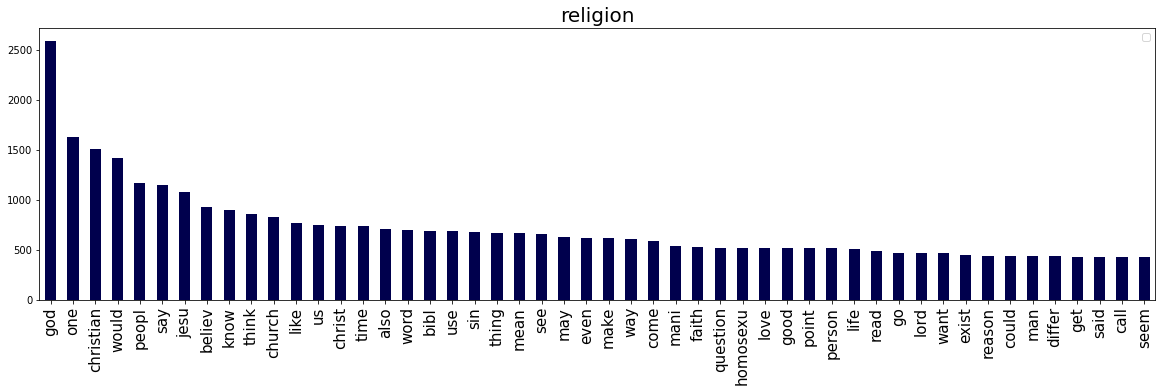

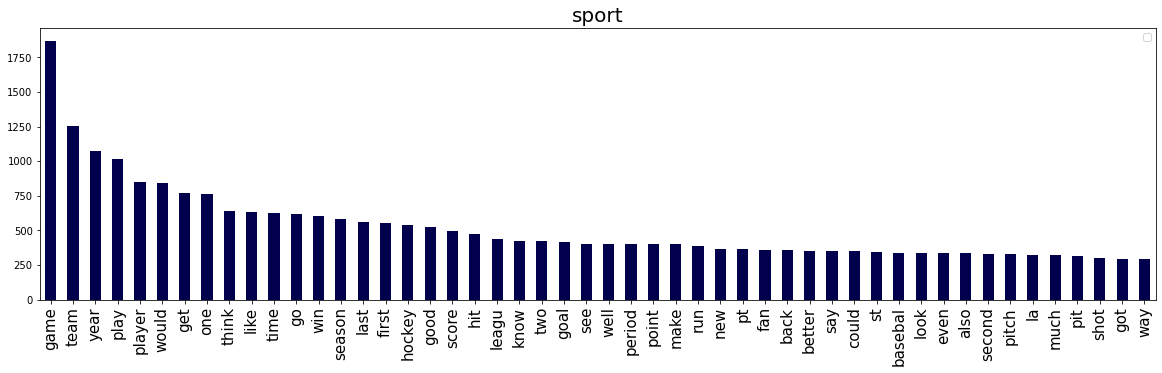

In [ ]:
plot_most_common_features(dataset.clean_text, dataset.target)

In [ ]:
def clean(email):            
    # Special characters
    email = re.sub(r"\x89Û_", "", email)
    email = re.sub(r"\x89ÛÒ", "", email)
    email = re.sub(r"\x89ÛÓ", "", email)
    email = re.sub(r"\x89ÛÏWhen", "When", email)
    email = re.sub(r"\x89ÛÏ", "", email)
    email = re.sub(r"China\x89Ûªs", "China's", email)
    email = re.sub(r"let\x89Ûªs", "let's", email)
    email = re.sub(r"\x89Û÷", "", email)
    email = re.sub(r"\x89Ûª", "", email)
    email = re.sub(r"\x89Û\x9d", "", email)
    email = re.sub(r"å_", "", email)
    email = re.sub(r"\x89Û¢", "", email)
    email = re.sub(r"\x89Û¢åÊ", "", email)
    email = re.sub(r"fromåÊwounds", "from wounds", email)
    email = re.sub(r"åÊ", "", email)
    email = re.sub(r"åÈ", "", email)
    email = re.sub(r"JapÌ_n", "Japan", email)    
    email = re.sub(r"Ì©", "e", email)
    email = re.sub(r"å¨", "", email)
    email = re.sub(r"SuruÌ¤", "Suruc", email)
    email = re.sub(r"åÇ", "", email)
    email = re.sub(r"å£3million", "3 million", email)
    email = re.sub(r"åÀ", "", email)
            
    # Character entity references
    email = re.sub(r"&gt;", ">", email)
    email = re.sub(r"&lt;", "<", email)
    email = re.sub(r"&amp;", "&", email)
    
    # Typos, slang and informal abbreviations
    email = re.sub(r"w/e", "whatever", email)
    email = re.sub(r"w/", "with", email)
    email = re.sub(r"USAgov", "USA government", email)
    email = re.sub(r"recentlu", "recently", email)
    email = re.sub(r"Ph0tos", "Photos", email)
    email = re.sub(r"amirite", "am I right", email)
    email = re.sub(r"exp0sed", "exposed", email)
    email = re.sub(r"<3", "love", email)
    email = re.sub(r"amageddon", "armageddon", email)
    email = re.sub(r"Trfc", "Traffic", email)
    email = re.sub(r"8/5/2015", "2015-08-05", email)
    email = re.sub(r"WindStorm", "Wind Storm", email)
    email = re.sub(r"8/6/2015", "2015-08-06", email)
    email = re.sub(r"10:38PM", "10:38 PM", email)
    email = re.sub(r"10:30pm", "10:30 PM", email)
    email = re.sub(r"16yr", "16 year", email)
    email = re.sub(r"lmao", "laughing my ass off", email)   
    email = re.sub(r"TRAUMATISED", "traumatized", email)
    
    # Urls
    email = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", email)
        
    # Words with punctuations and special characters
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`"
    for p in punctuations:
        email = email.replace(p, f' {p} ')
        
    return email

In [ ]:
def process_text(raw_text):      
    raw_text = clean(raw_text)
    letters_only = re.sub("[^a-zA-Z]", " ",raw_text) 
    letters_only = letters_only.lower()
    letters_only = re.sub('\[.*?\]', '', letters_only)
    letters_only= re.sub('https?://\S+|www\.\S+', '', letters_only)
    letters_only = re.sub('<.*?>+', '', letters_only)
    letters_only = re.sub('[%s]' % re.escape(string.punctuation), '', letters_only)
    letters_only = re.sub('\n', '', letters_only)
    letters_only = re.sub('\w*\d\w*', '', letters_only)
    words = letters_only.lower().split()
    
    stops = set(stopwords.words("english"))  
    not_stop_words = [w for w in words if not w in stops]
    
    stemmer = PorterStemmer()
    stemmed = [stemmer.stem(word) for word in not_stop_words]
    
    return( " ".join( stemmed )) 

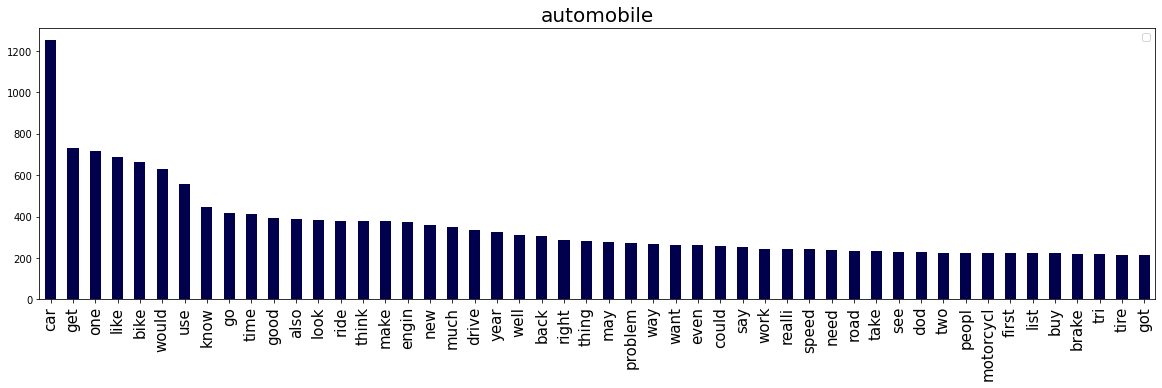

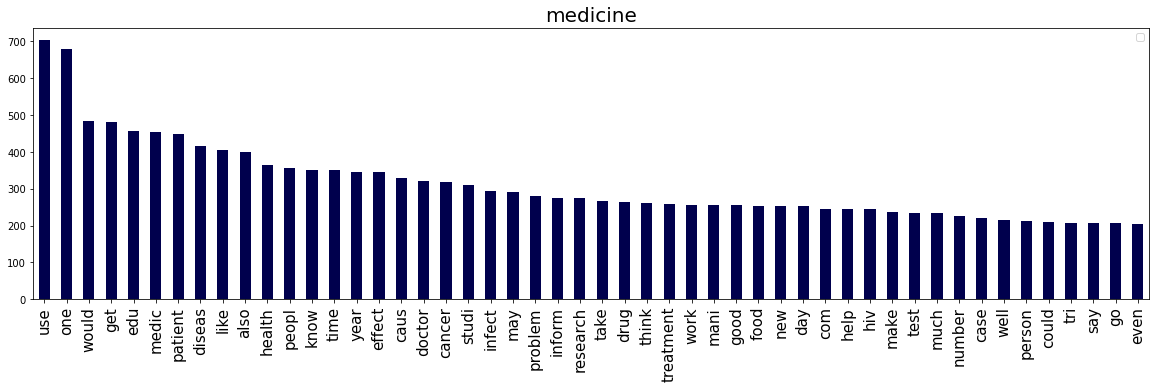

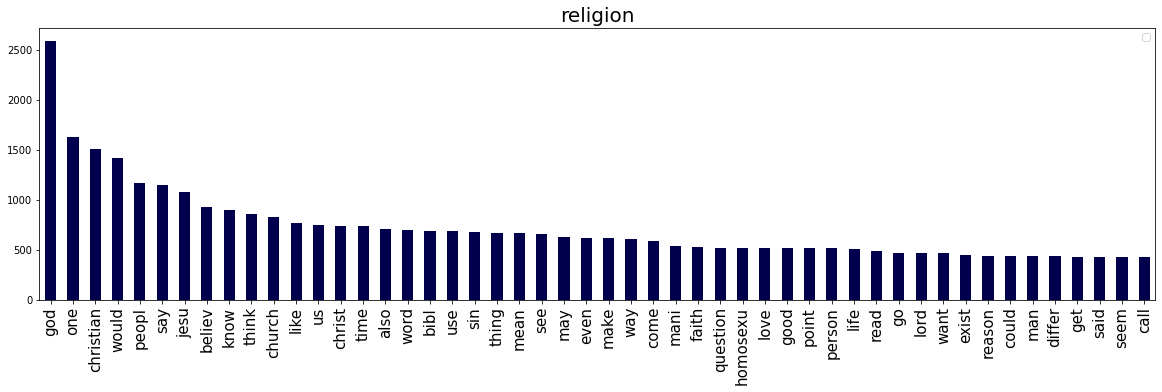

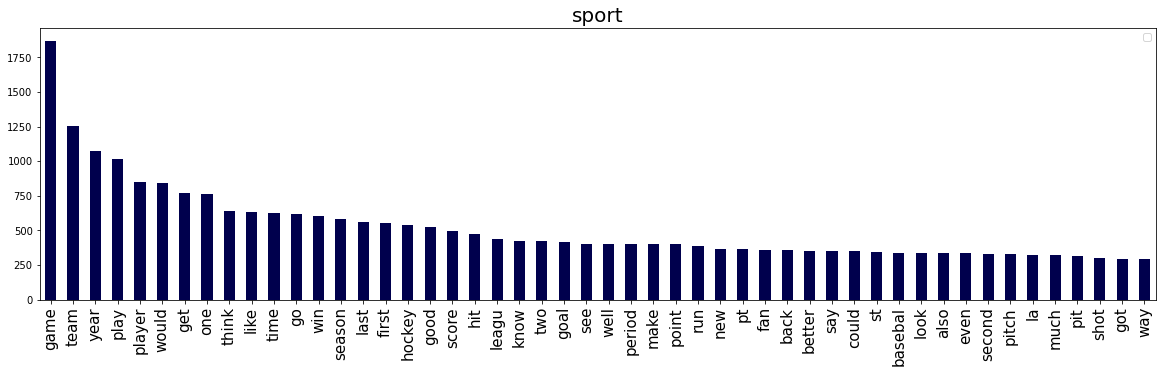

In [ ]:
dataset['clean_text'] = dataset['text'].apply(lambda x: process_text(x))
plot_most_common_features(dataset.clean_text, dataset.target)

In [ ]:
X_train = dataset[0:len(training_df)][["clean_text"]]
X_test = dataset[len(training_df):len(dataset)][["clean_text"]]

In [ ]:
y_train = dataset[0:len(training_df)][["target"]]
y_test = dataset[len(training_df):len(dataset)][["target"]]

# Machine Learning Models

In [ ]:
# Hot encoding for the labels
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_train.target.values)
target_labels = le.classes_
encoded_y_train = le.transform(y_train.target.values)

In [ ]:
count_vect = CountVectorizer(analyzer = "word")
train_features = count_vect.fit_transform(X_train['clean_text'])
test_features = count_vect.fit_transform(X_test['clean_text'])

tfidf = TfidfTransformer(norm="l2")
train_text_tfidf_features = tfidf.fit_transform(train_features)
test_text_tfidf_features = tfidf.fit_transform(test_features)    

In [ ]:
#Missing to include a rebalance of the classes in the train set. SMOTE or equivalent.

In [ ]:
def train_and_evaluate_classifier(X, yt, estimator, grid):
    """Train and Evaluate a estimator (defined as input parameter) on the given labeled data using accuracy."""
    
    # Cross validation
    from sklearn.model_selection import ShuffleSplit
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
      
    from sklearn.model_selection import GridSearchCV
    grid_search = GridSearchCV(estimator=estimator, cv=cv,  param_grid=grid, error_score=0.0, n_jobs = -1, verbose = 0)
    
    # Train the model over and tune the parameters
    print("Training model")
    grid_search.fit(X, yt)

    # CV-score
    print("Best score: %0.3f" % grid_search.best_score_)
    if len(grid) > 0:
        best_parameters = grid_search.best_estimator_.get_params()
        print("Best parameters set:",best_parameters)
    return grid_search

# Decision Trees 

In [ ]:
# Decision Trees model
from sklearn.tree import DecisionTreeClassifier

criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = range(5, 200)
max_features = ['auto', 'sqrt', 'log2']

params_DT = {
    'criterion' : criterion,
    'splitter' : splitter,
    'max_depth' : max_depth,
    'max_features' : max_features
}

DT_cls = train_and_evaluate_classifier(train_text_tfidf_features, encoded_y_train, DecisionTreeClassifier(), params_DT)

Training model
Best score: 0.690
Best parameters set: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 160, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [ ]:
#Include a confusion matrix and metrics over the test set- same for all classifiers

# Naive Bayes

In [ ]:
nb_text_cls = train_and_evaluate_classifier(train_text_tfidf_features, encoded_y_train, MultinomialNB(), {})

Training model
Best score: 0.882


# SVM

In [ ]:
# SVM model
from sklearn.svm import SVC

svm_grid = [
  {'C': [0.01, 0.1, 1], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': ['scale', 'auto'], 'kernel': ['rbf']},
 ]

svm_cls = train_and_evaluate_classifier(train_text_tfidf_features, encoded_y_train, SVC(), svm_grid)

Training model
Best score: 0.912
Best parameters set: {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


# KNN

In [ ]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = range(5, 6)
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = range(30, 100)
p = range(1, 4)

params_knn = {
    'n_neighbors' : n_neighbors,
    'weights' : weights,
    'algorithm' : algorithm,
    'leaf_size' : leaf_size,
    'p'  : p
}

KNN_cls = train_and_evaluate_classifier(train_text_tfidf_features, encoded_y_train, KNeighborsClassifier(), params_knn)

Training model
Best score: 0.415
Best parameters set: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


# MaxEnt Classifiers

In [ ]:
from sklearn.linear_model import LogisticRegression
max_ent_grid= {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
max_ent_cls = train_and_evaluate_classifier(train_text_tfidf_features, encoded_y_train, LogisticRegression(), max_ent_grid)

Training model
Best score: 0.921
Best parameters set: {'C': 100, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# LSTM

In [ ]:
from fastai.basics import *
from fastai.callback.all import *
from fastai.text.all import *

In [ ]:
# Language model data
df_all = pd.concat([training_df, test_df])

dls_lm = DataBlock(
    blocks=TextBlock.from_df('text', is_lm=True),
    get_x=ColReader('text'),
    splitter=RandomSplitter(0.1)
).dataloaders(df_all, bs=64, seq_len=40)

dls_lm.show_batch(max_n=5)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `n_workers` has to be changed to 0 to avoid getting stuck


C:\Users\inies\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,text,text_
0,"xxbos xxmaj of course , xxmaj i 'd still recommend that xxmaj michael read _ true and xxmaj reasonable _ \n by xxmaj douglas xxmaj xxunk . \n\n xxmaj joe xxmaj fisher xxbos xxmaj rex xxmaj xxunk ( xxunk )","xxmaj of course , xxmaj i 'd still recommend that xxmaj michael read _ true and xxmaj reasonable _ \n by xxmaj douglas xxmaj xxunk . \n\n xxmaj joe xxmaj fisher xxbos xxmaj rex xxmaj xxunk ( xxunk ) xxunk"
1,3 0 6 xxup rus xxup buf xxup rw 89 xxmaj alexander xxmaj mogilny \n▁ 3 6 2 4 2 xxwrep 3 0 6 xxup can xxup bos c 49 * joe xxmaj juneau \n▁ 3 5 2 3 2,0 6 xxup rus xxup buf xxup rw 89 xxmaj alexander xxmaj mogilny \n▁ 3 6 2 4 2 xxwrep 3 0 6 xxup can xxup bos c 49 * joe xxmaj juneau \n▁ 3 5 2 3 2 xxwrep
2,", "" elohim "" is translated with a \n capital "" g. "" xxmaj when referring to false gods and goddesses and the judges \n of xxmaj israel , it is translated with a small "" g. "" xxmaj it",""" elohim "" is translated with a \n capital "" g. "" xxmaj when referring to false gods and goddesses and the judges \n of xxmaj israel , it is translated with a small "" g. "" xxmaj it is"
3,"occurring substances known as neurotrophic factors can \n prevent the degeneration of light - sensing cells in the retina of the eye . xxmaj the \n degeneration of these cells , known as photoreceptors , is a major cause of","substances known as neurotrophic factors can \n prevent the degeneration of light - sensing cells in the retina of the eye . xxmaj the \n degeneration of these cells , known as photoreceptors , is a major cause of \n"
4,"from xxmaj his fellowship , not \n because xxmaj he chose to send you into outer darkness , but because you chose to go \n there . \n\n\n\n xxmaj when i rebelled against my earthly father , he spanked me","xxmaj his fellowship , not \n because xxmaj he chose to send you into outer darkness , but because you chose to go \n there . \n\n\n\n xxmaj when i rebelled against my earthly father , he spanked me ."


In [ ]:
learn = language_model_learner(
    dls_lm, AWD_LSTM, drop_mult=0.3, 
    metrics=[accuracy, Perplexity()]).to_fp16()

C:\Users\inies\anaconda3\lib\site-packages\torch\cuda\amp\autocast_mode.py:118: UserWarning: torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.")


C:\Users\inies\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:116: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


SuggestedLRs(lr_min=0.01659586876630783, lr_steep=0.03630780428647995)

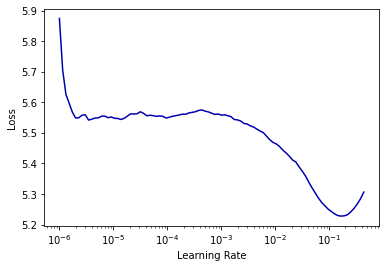

In [ ]:
learn.lr_find(start_lr=1e-6, end_lr=1)

In [ ]:
learn.fit_one_cycle(1, 1e-2)

C:\Users\inies\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:116: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.164141,4.092400,0.271205,59.883446,47:48


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(10, 1e-3)

C:\Users\inies\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:116: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.665764,3.916722,0.300469,50.235481,1:12:42


In [ ]:
TEXT = "My country is Spain"
N_WORDS = 40
N_SENTENCES = 2
preds = [learn.predict(TEXT, N_WORDS, temperature=0.75) 
         for _ in range(N_SENTENCES)]

In [ ]:
print("\n".join(preds))

In [ ]:
learn.save_encoder('ft_enc_extended')

In [ ]:
dls_class = DataBlock(
    blocks=(
        TextBlock.from_df('text', # We take the textual information from the column "text" in the dataset
                          seq_len=40, # Maximum tweet length
                          vocab=dls_lm.vocab # We use the same vocabulary representation than the one used for the LM
                          ), 
            CategoryBlock), # Because we will use these data for classification
    get_x=ColReader('text'),
    get_y=ColReader('target'),
    splitter=RandomSplitter(0.2)) # Randomly splits the dataset (20% for Validation, 80% for training)
.dataloaders(training_df, bs=64)

dls_class.show_batch(max_n=10)

In [ ]:
learn = text_classifier_learner(dls_class, AWD_LSTM, drop_mult=0.8, metrics=[accuracy,FBeta(beta=1)]).to_fp16()
learn.load_encoder('ft_enc_extended')
learn.freeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(1, 1e-2)

In [ ]:
learn.save('lstm_1')

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2))

In [ ]:
learn.save('lstm_2')

In [ ]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(1e-2/2/(2.6**4),1e-2/2))

In [ ]:
learn.save('lstm_3')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(20, slice(1e-2/10/(2.6**4),1e-2/10))

In [ ]:
learn.save('lstm_4')

In [ ]:
# get predictions
preds, targets = learn.get_preds()

predictions = np.argmax(preds, axis = 1)
pd.crosstab(predictions, targets)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(targets, predictions))

In [ ]:
learn.save('final_lstm_model')

# Transformers

In [ ]:
# Try a distill transformer and other models.

In [ ]:
import tensorflow as tf
import ktrain
from ktrain import text

In [ ]:
trn, val, preproc = text.texts_from_df(training_df,'text',preprocess_mode='bert',label_columns='target',verbose=True, maxlen=32) # Process the input tweets based on the BERT encoder

model = text.text_classifier('bert', trn, preproc=preproc) # Create a text classifier that uses the BERT-based representations created before

learner = ktrain.get_learner(model, train_data=trn, val_data=val,  batch_size=128) # Creates the learning process to fine-tune bert and train the classifier.

In [ ]:
learner.lr_find(show_plot=True, max_epochs=2)

In [ ]:
learner.autofit(lr=1e-4, # Learning Rate 
                epochs=5, # Number of epochs to train the model
                early_stopping=2, # If the model does not improve after 2 epochs, we stop the training
                reduce_on_plateau=1,  # If the model does not improve aftear 1 epoch, we reduce the learning rate
                monitor='val_loss', # Metric to monitor the peformance of the model (loss computed on the validation dataset)
                checkpoint_folder='transformer_cpt_1' # After each epoch we store a checkpoint of the model
                )

In [ ]:
learner.save_model('transformer_1') # Saving the trained model

In [ ]:
learner.unfreeze()
learner.fit_onecycle(1e-4/10, 1, checkpoint_folder='transformer_cpt_2')

In [ ]:
learner.save_model('transformer_2') # Store the final model

In [ ]:
learner.validate(class_names=['Regular Tweet','Disaster Tweet'])

In [ ]:
learner.view_top_losses(n=10, preproc=preproc)

In [ ]:
#!pip3 install -q git+https://github.com/amaiya/eli5@tfkeras_0_10_1

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

predictor.explain("[CLS] the government is concerned about the population explosion and the population is concerned about the government explosion . - joe moore [SEP]")